In [1]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv('Resources/indeed_job_dataset.csv')
df.head()

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,Unnamed: 6,No_of_Skills,Company,No_of_Reviews,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0.0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"SAP, SQL",NaN,2.0,Express Scripts,3301.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"Machine Learning, R, SAS, SQL, Python",NaN,5.0,Money Mart Financial Services,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"Data Mining, Data Management, R, SAS, SQL, STA...",NaN,9.0,comScore,62.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,Certified Internal Auditor,NaN,1.0,Central Intelligence Agency,158.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4.0,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"Statistical Software, Time Management, R, Micr...",NaN,7.0,Federal Reserve Bank of Dallas,495.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [3]:
data_cleaning = df.replace({'Queried_Salary' : {'<80000': 80000, '80000-99999': 90000, '100000-119999': 110000, '120000-139999': 130000, '140000-159999': 150000, '>160000': 160000}}) 

In [4]:
data_cleaning.drop(['Unnamed: 0', 'Unnamed: 6'], axis=1)

,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,Date_Since_Posted,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,80000.0,data_scientist,"SAP, SQL",2.0,Express Scripts,3301.0,3.3,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,80000.0,data_scientist,"Machine Learning, R, SAS, SQL, Python",5.0,Money Mart Financial Services,NaN,NaN,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,80000.0,data_scientist,"Data Mining, Data Management, R, SAS, SQL, STA...",9.0,comScore,62.0,3.5,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,80000.0,data_scientist,Certified Internal Auditor,1.0,Central Intelligence Agency,158.0,4.3,30.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,80000.0,data_scientist,"Statistical Software, Time Management, R, Micr...",7.0,Federal Reserve Bank of Dallas,495.0,4.1,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,Data Scientist - Entry to Experienced Level,https://www.indeed.com/rc/clk?jk=835a2db493898...,80000.0,data_scientist,"AI, Quantitative Analysis, Data Mining, Machin...",6.0,National Security Agency,173.0,4.3,30.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Geospatial Data Scientist,https://www.indeed.com/rc/clk?jk=6255c4e94a7ef...,80000.0,data_scientist,"Statistical Software, Machine Learning, R, Ima...",10.0,NYC Careers,30.0,3.8,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,Data Scientist,https://www.indeed.com/rc/clk?jk=f30ab3f52226b...,80000.0,data_scientist,"Machine Learning, R, SQL",3.0,OM Partners,NaN,NaN,10.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Bioinformatics Data Scientist,https://www.indeed.com/rc/clk?jk=a6e45b6264f26...,80000.0,data_scientist,"Linux, R, C/C++, Python",4.0,University of Idaho,233.0,4.2,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9,Data Scientist,https://www.indeed.com/rc/clk?jk=56090c965b57d...,80000.0,data_scientist,"JavaScript, Data Mining, TS/SCI Clearance, R, ...",6.0,usajobs.gov,4227.0,4.3,22.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
data_clean = data_cleaning.dropna(subset=['Queried_Salary', 'Date_Since_Posted'])

In [6]:
data_clean.Queried_Salary.unique()

array([ 80000.,  90000., 110000., 130000., 150000., 160000.])

In [7]:
data_clean.Date_Since_Posted.unique()

array([ 1., 15., 30.,  5., 10., 22.,  6., 11., 21.,  2., 16., 18.,  3.,
        7.,  8.,  4., 14., 13., 28., 23., 19., 20., 12., 25., 29.,  9.,
       26., 27., 17., 24.])

In [8]:
y = data_clean["Queried_Salary"].values.reshape(-1,1)
X = data_clean[["Date_Since_Posted"]]
print(X.shape, y.shape)

(5611, 1) (5611, 1)


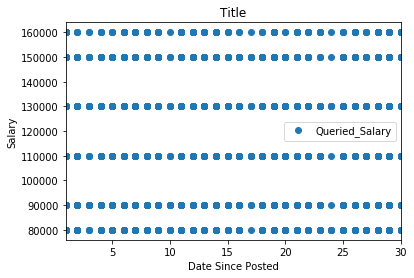

In [9]:
data_clean.plot(x='Date_Since_Posted', y='Queried_Salary', style='o')  
plt.title('Title')  
plt.xlabel('Date Since Posted')  
plt.ylabel('Salary')  
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [11]:
model.fit(X, y)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.008867996854932003
Testing Score: 0.007140896779794236


In [14]:
model.rank_

1

In [15]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[240.84578532]]
y-axis intercept:  [111328.9838754]


In [16]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [80000.]
Predicted output: [111569.82966072]
Prediction Error: [31569.82966072]


In [17]:
pd.DataFrame({"Predicted": [predictions], "Actual": [y], "Error": [predictions - y]})[["Predicted", "Actual", "Error"]]

,Predicted,Actual,Error
0,"[[111569.8296607192], [114941.67065513837], [1...","[[80000.0], [80000.0], [80000.0], [80000.0], [...","[[31569.829660719202], [34941.67065513837], [3..."


In [18]:
x_min = X.min()
x_max = X.max()

In [19]:
y_min_actual = y.min()
y_max_actual = y.max()

In [20]:
y_min = 101.896225057 + 12.44002424 * x_min
y_max = 101.896225057 + 12.44002424 * x_max
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

Actual Min Value: 80000.0
Calculated Min Value: Date_Since_Posted    114.336249
dtype: float64
Actual Max Value: 160000.0
Calculated Max Value: Date_Since_Posted    475.096952
dtype: float64


In [21]:
x_min

Date_Since_Posted    1.0
dtype: float64

In [22]:
x_max

Date_Since_Posted    30.0
dtype: float64

In [23]:
y_min

Date_Since_Posted    114.336249
dtype: float64

In [24]:
y_max

Date_Since_Posted    475.096952
dtype: float64

In [25]:
y_min_predicted = model.predict(np.array(x_min).reshape(-1,1))
y_max_predicted = model.predict(np.array(x_max).reshape(-1,1))
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")

Actual Min Value: 80000.0
Predicted Min Value: [[111569.82966072]]
Actual Max Value: 160000.0
Predicted Max Value: [[118554.35743487]]


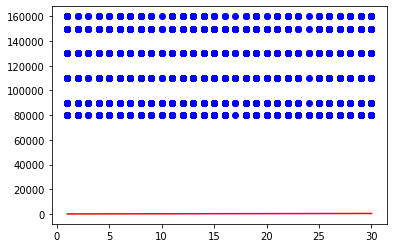

In [26]:
plt.scatter(X, y, c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [28]:
from sklearn.base import BaseEstimator, TransformerMixin
class PandasDummies(BaseEstimator, TransformerMixin):
    def transform(self, X, *_):
        return pd.get_dummies(X)
    
    def fit(self, *_):
        return self

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
model = make_pipeline(PandasDummies(), StandardScaler(), LinearRegression())
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('pandasdummies', PandasDummies()),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [31]:
model.steps

[('pandasdummies', PandasDummies()),
 ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('linearregression',
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False))]

In [32]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

In [33]:
print(f"MSE: {MSE}, R2: {r2}")

MSE: 639218773.747075, R2: 0.007140896779794236


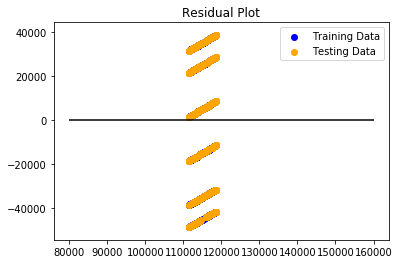

In [34]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [35]:
industry_clean = df.dropna(subset=['Company_Industry'])

In [36]:
industry = str(industry_clean.Company_Industry)
industry

'0                        Health Care\n3                         Government\n4       Banks and Financial Services\n6                         Government\n8              Education and Schools\n                    ...             \n5708    Human Resources and Staffing\n5711    Human Resources and Staffing\n5712    Banks and Financial Services\n5713    Banks and Financial Services\n5714           Aerospace and Defense\nName: Company_Industry, Length: 3826, dtype: object'

In [37]:
ind = pd.DataFrame(industry_clean.Company_Industry)
ind.head()

,Company_Industry
0,Health Care
3,Government
4,Banks and Financial Services
6,Government
8,Education and Schools


In [38]:
#ind['Company_Industry'].value_counts()

In [39]:
len(ind['Company_Industry'].unique())

33

In [40]:
industry1 = str(ind)

In [41]:
print(len(industry1))

444


In [42]:
import re
output = re.sub(r'\d+', '', industry1)
print(output)

                  Company_Industry
                      Health Care
                       Government
     Banks and Financial Services
                       Government
            Education and Schools
...                            ...
  Human Resources and Staffing
  Human Resources and Staffing
  Banks and Financial Services
  Banks and Financial Services
         Aerospace and Defense

[ rows x  columns]


In [43]:
#df = pd.DataFrame(output)

In [44]:
import nltk
nltk.download('popular')
from nltk.probability import FreqDist

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to C:\Users\David
[nltk_data]    |     Blalock\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to C:\Users\David
[nltk_data]    |     Blalock\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to C:\Users\David
[nltk_data]    |     Blalock\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to C:\Users\David
[nltk_data]    |     Blalock\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to C:\Users\David
[nltk_data]    |     Blalock\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading

In [45]:
from string import punctuation
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

In [46]:
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(output)
tokens

['Company_Industry',
 'Health',
 'Care',
 'Government',
 'Banks',
 'and',
 'Financial',
 'Services',
 'Government',
 'Education',
 'and',
 'Schools',
 'Human',
 'Resources',
 'and',
 'Staffing',
 'Human',
 'Resources',
 'and',
 'Staffing',
 'Banks',
 'and',
 'Financial',
 'Services',
 'Banks',
 'and',
 'Financial',
 'Services',
 'Aerospace',
 'and',
 'Defense',
 'rows',
 'x',
 'columns']

In [47]:
tokens_str = str(tokens)

In [48]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stopwords = set(stopwords.words('english')+ list(punctuation))
word_tokens = word_tokenize(tokens_str)
filtered_words = [w for w in word_tokens if not w in stopwords]
filtered_words = []
for w in word_tokens:
    if w not in stopwords:
        filtered_words.append(w)
print(filtered_words)

["'Company_Industry", "'Health", "'Care", "'Government", "'Banks", "'and", "'Financial", "'Services", "'Government", "'Education", "'and", "'Schools", "'Human", "'Resources", "'and", "'Staffing", "'Human", "'Resources", "'and", "'Staffing", "'Banks", "'and", "'Financial", "'Services", "'Banks", "'and", "'Financial", "'Services", "'Aerospace", "'and", "'Defense", "'rows", 'x', "'columns"]


In [49]:
from collections import Counter
word_frequency = Counter(tokens_str.split())
print("Vector of frequencies:\n {}".format(list(word_frequency.values())))
print("Corresponding words:\n {}".format(list(word_frequency.keys())))

Vector of frequencies:
 [1, 1, 1, 2, 3, 7, 3, 3, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1]
Corresponding words:
 ["['Company_Industry',", "'Health',", "'Care',", "'Government',", "'Banks',", "'and',", "'Financial',", "'Services',", "'Education',", "'Schools',", "'Human',", "'Resources',", "'Staffing',", "'Aerospace',", "'Defense',", "'rows',", "'x',", "'columns']"]


In [50]:
word_frequency

Counter({"['Company_Industry',": 1,
         "'Health',": 1,
         "'Care',": 1,
         "'Government',": 2,
         "'Banks',": 3,
         "'and',": 7,
         "'Financial',": 3,
         "'Services',": 3,
         "'Education',": 1,
         "'Schools',": 1,
         "'Human',": 2,
         "'Resources',": 2,
         "'Staffing',": 2,
         "'Aerospace',": 1,
         "'Defense',": 1,
         "'rows',": 1,
         "'x',": 1,
         "'columns']": 1})

In [51]:
fdist1 = FreqDist(word_frequency)
print(fdist1)

<FreqDist with 18 samples and 34 outcomes>


In [52]:
fdist1

FreqDist({"'and',": 7, "'Banks',": 3, "'Financial',": 3, "'Services',": 3, "'Government',": 2, "'Human',": 2, "'Resources',": 2, "'Staffing',": 2, "['Company_Industry',": 1, "'Health',": 1, ...})

In [53]:
word_frequency.most_common(10)

[("'and',", 7),
 ("'Banks',", 3),
 ("'Financial',", 3),
 ("'Services',", 3),
 ("'Government',", 2),
 ("'Human',", 2),
 ("'Resources',", 2),
 ("'Staffing',", 2),
 ("['Company_Industry',", 1),
 ("'Health',", 1)]

In [54]:
print(stopwords)

{'yourselves', 'will', "didn't", "haven't", 'me', '/', 'has', ';', 'myself', 'aren', 'any', 'most', "won't", 'hers', 'i', "you're", 'an', 'am', 'when', 'other', "'", 'very', 'down', '*', 't', 'why', '`', 'were', 'out', '&', '[', "wouldn't", 'because', "doesn't", 'that', 'itself', 'both', 'being', 'hadn', 'himself', 'but', '(', 'from', 've', 'up', 'doing', 'until', 'not', 'nor', "you'd", "weren't", 'wouldn', 'had', 'under', 'do', 'then', '$', 'in', "you've", '|', "wasn't", 'with', '^', 'while', 'and', "shouldn't", 'their', 'needn', 'above', 'her', 's', 'here', 'for', 'below', 'should', 'hasn', 'herself', "mustn't", 'this', 'further', 'he', 'again', 'few', ':', 'a', 'on', '?', ']', 'all', 'by', 'before', 'been', 'you', 'we', '.', 'they', '>', 'whom', 'shouldn', 'doesn', '<', '\\', "that'll", 'ma', 'ain', 'of', "isn't", 're', 'shan', 'about', 'off', 'didn', 'those', 'haven', "shan't", '@', 'the', 'which', 'just', 'my', 'don', ',', 'against', 'does', 'your', "it's", 'd', 'its', 'yourself',

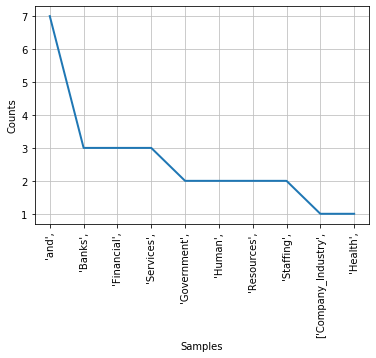

In [55]:
fdist1.plot(10)

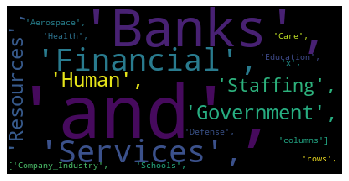

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(fdist1)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()